# Statistical Analysis of participants

Miguel Xochicale [@mxochicale](https://github.com/mxochicale), Nhat Phung Tran Huy  [@huynhatd13](https://github.com/huynhatd13), ect.

Jan, Feb and March 2022

## 1 Introduction

This notebook presents prototypes for demographic analysis of participants.

### 1.1 Running notebook
Go to echocardiography repository path: `$HOME/repositories/2022-echocardiography-proceedings/`
Open echocardiography repo in pycharm and in the terminal type:
```
git checkout master # or the branch
git pull # to bring a local branch up-to-date with its remote version
```
Launch Notebook server Go to you repository path: `cd $HOME/repositories/2022-echocardiography-proceedings/proceedings/statistica-analysis/` and type in the pycharm terminal:

```
conda activate echo-paper-ve
jupyter notebook
```
which will open your web-browser.

### 1.2 References
* B. Glocker, C. Jones, M. Bernhardt, S. Winzeck. Algorithmic encoding of protected characteristics in image-based models for disease detection. 2021. pre-print arXiv:2110.14755. https://github.com/biomedia-mira/chexploration/tree/main/notebooks added 26JAN2022



# 2. Jupyter Notebook
## 2.1 Setting imports and datasets paths

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_dir = '../datafiles/'
datatablea_adm_src_anonymised = pd.read_csv(data_dir + 'adm_src_anonymised_generated14March2022.csv')


## 2.1 Loading and filtering dataframe tables


In [2]:
dt_datatable_adm_src_anonymised = pd.DataFrame(datatablea_adm_src_anonymised)
#dt_datatable_adm_src_anonymised.head()

## Filtering columns
basic_demographics=dt_datatable_adm_src_anonymised.filter(items=[ 'SUBJID', 'SEX', 'WEIGHT', 'HEIGHT', 'AGE', 'SEPSIS', 'DENGUE', 'ADMITTEDICU'])
#basic_demographics.head()
basic_demographics.tail()

,SUBJID,SEX,WEIGHT,HEIGHT,AGE,SEPSIS,DENGUE,ADMITTEDICU
182,310,M,60,160,67.0,False,False,True
183,311,M,72,170,66.0,False,False,True
184,312,M,60,165,72.0,False,False,True
185,313,F,45,155,24.0,False,False,True
186,314,M,65,160,69.0,False,False,True


## 3. Understanding relationship of patient demographics and presence of disease

=================== GENDER =======================


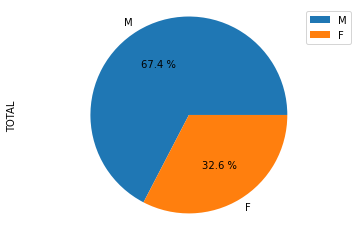

=================== GENDER, SEPSIS =======================


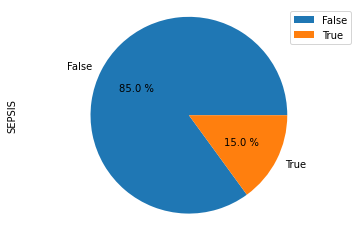

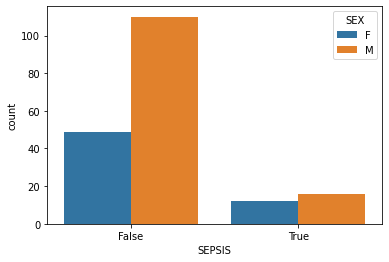

=================== GENDER, DENGUE =======================


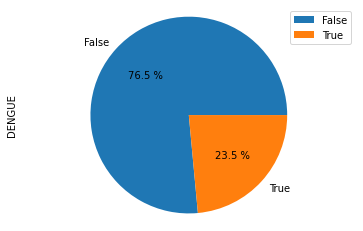

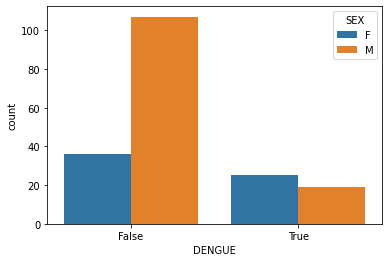

=================== GENDER, ADMITTEDICU =======================


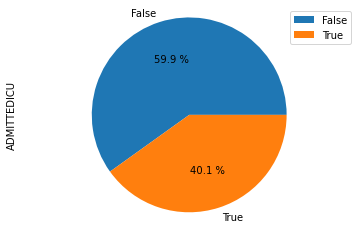

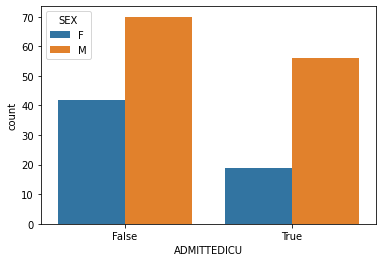

In [3]:
print(f'=================== GENDER =======================')
basic_demographics['SEX'].value_counts().plot.pie(autopct='%.1f %%', ylabel='TOTAL', legend=True)
plt.axis('equal')
plt.show()



print(f'=================== GENDER, SEPSIS =======================')
basic_demographics['SEPSIS'].value_counts().plot.pie(autopct='%.1f %%', ylabel='SEPSIS', legend=True)
plt.axis('equal')
plt.show()

sns.countplot(data=basic_demographics,x='SEPSIS',hue='SEX')
plt.show()


print(f'=================== GENDER, DENGUE =======================')

basic_demographics['DENGUE'].value_counts().plot.pie(autopct='%.1f %%', ylabel='DENGUE', legend=True)
plt.axis('equal')
plt.show()

sns.countplot(data=basic_demographics,x='DENGUE',hue='SEX')
plt.show()


print(f'=================== GENDER, ADMITTEDICU =======================')

basic_demographics['ADMITTEDICU'].value_counts().plot.pie(autopct='%.1f %%', ylabel='ADMITTEDICU', legend=True)
plt.axis('equal')
plt.show()

sns.countplot(data=basic_demographics,x='ADMITTEDICU',hue='SEX')
plt.show()

